In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

##### [l,w] for l,w in zip ([1,2,3], [4,5,6]) 를 np.column_stack으로 간단하게 구현할 수 있다
##### np.column_stack() 안의 파라미터는 튜플로 전달해야 한다.

In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [6]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


##### 데이터가 클수록 파이썬 리스트는 비효율적이므로 넘파이 배열을 사용하는 게 좋습니다.

In [7]:
from sklearn.model_selection import train_test_split

##### 사이킷런 패키지의 model_selection 모듈 아래 있는 train_test_split()메소드를 사용한다는 뜻
##### train_test_split() 메소드가 shuffle기능까지 해준다.

In [8]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

##### fish_data를 train_input 이 75% test_input 이 25%, fish_target을 train_target이 75% test_target이 25% 분배한다.

In [9]:
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

(36, 2) (13, 2) (36,) (13,)


In [10]:
print(train_target)

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

C:\Users\AIO-10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [13]:
print(kn.predict([[25,150]]))

[0.]


C:\Users\AIO-10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


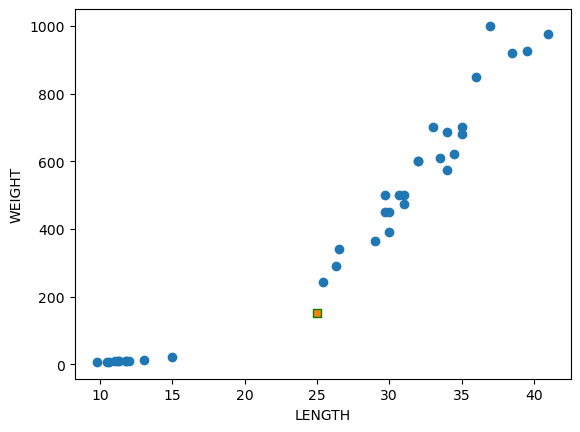

In [22]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="s",edgecolors="green")
plt.xlabel("LENGTH")
plt.ylabel("WEIGHT")
plt.show()

In [23]:
distances, indexes = kn.kneighbors([[25,150]])   # 첫번째는 거리, 두번쨰는 인덱스를 반환, 변수이름은 상관없다.

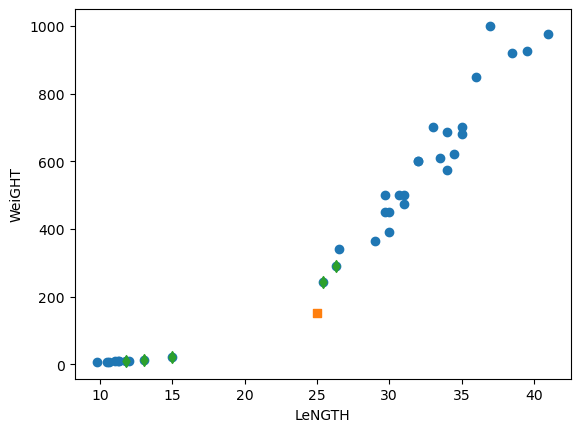

In [24]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="s")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="d")
plt.xlabel("LeNGTH")
plt.ylabel("WeiGHT")
plt.show()

In [25]:
print(indexes)

[[12 29  5 19  4]]


In [26]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


In [31]:
print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]
[[1. 0. 0. 1. 0.]]


In [33]:
np.row_stack((distances, train_target[indexes]))

array([[ 92.00086956, 130.48375378, 138.32150953, 140.00603558,
        140.62090883],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          0.        ]])

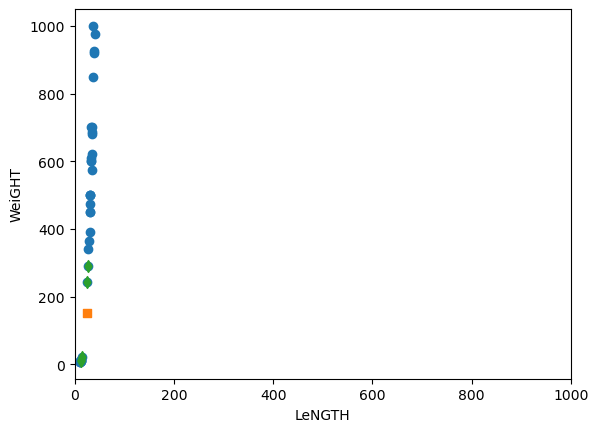

In [39]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="s")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="d")
plt.xlim(0, 1000)   #x축 scale을 늘림
plt.xlabel("LeNGTH")
plt.ylabel("WeiGHT")
plt.show()

In [40]:
mean1 = np.mean(train_input, axis=0)
std1 = np.std(train_input, axis=0)

##### axis옵션은 n차원 배열이 파라미터로 쓰일 때 사용한다.
##### axis = 0 이면 각 열을 계산하고, axis = 1 이면 각 행을 계산한다.
##### 나는 axis = 0 으로 했으니 각 특성(열)별로 계산한다

In [41]:
print(mean1, std1)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [42]:
train_scaled = (train_input - mean1) / std1

##### numpy배열은 똑똑하다.
##### train_input의 모든 행에서 이 산술을 수행한다. 49개 행 모두 이 연산을 수행한다. 이걸 'broadcasting'이라고 한다

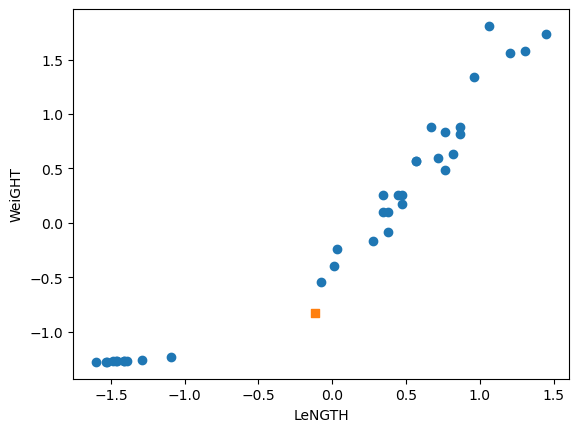

In [46]:
new = ([25,150] - mean1) / std1   #[25,150]도 표준점수 연산에 동참해야 한다.

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker="s")
###plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="d")

plt.xlabel("LeNGTH")
plt.ylabel("WeiGHT")
plt.show()

In [48]:
kn = kn.fit(train_scaled, train_target)

In [49]:
kn.score(test_input, test_target)

C:\Users\AIO-10\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7692307692307693

In [51]:
dist, inde = kn.kneighbors([new])

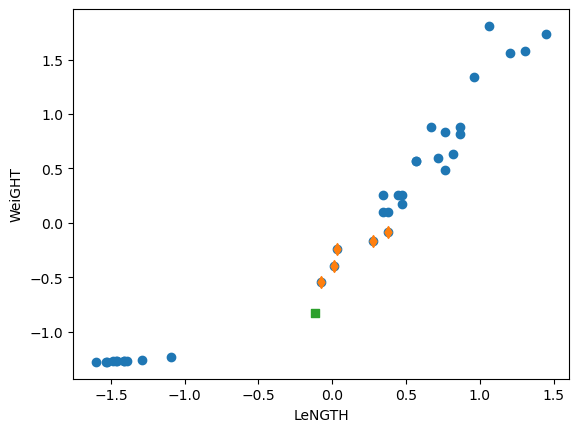

In [53]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(train_scaled[inde, 0], train_scaled[inde, 1], marker="d")
plt.scatter(new[0], new[1], marker="s")
plt.xlabel("LeNGTH")
plt.ylabel("WeiGHT")
plt.show()
